In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np

In [3]:
matplotlib.rcParams.update({
    'font.size': 12,
    'lines.markersize': 10,
})
plt.style.use('tableau-colorblind10')

In [4]:
METHODS = ["blast", "vpsearch", "ggsearch", "nmslib"]  # NMSLIB should be the last one in this list
SIZES = [100, 1000, 10_000, 100_000, "all"]

In [5]:
data = {}
for method in METHODS:
    for size in SIZES:
        data[(method, size)] = np.loadtxt(f"../query/timings-{method}-silva-{size}.txt")

In [6]:
means = {
    key: np.mean(arr) for key, arr in data.items()
}

In [7]:
means

{('blast', 100): 0.29012094242859476,
 ('blast', 1000): 1.0692946447143186,
 ('blast', 10000): 7.949886153285661,
 ('blast', 100000): 68.63211874885708,
 ('blast', 'all'): 157.21300091457124,
 ('vpsearch', 100): 0.6927566881430332,
 ('vpsearch', 1000): 3.3702428145714163,
 ('vpsearch', 10000): 13.505839769285688,
 ('vpsearch', 100000): 25.30861727499996,
 ('vpsearch', 'all'): 20.340331890000016,
 ('ggsearch', 100): 0.8091370621427814,
 ('ggsearch', 1000): 3.0289768362858274,
 ('ggsearch', 10000): 25.01372193800002,
 ('ggsearch', 100000): 245.60432285442857,
 ('ggsearch', 'all'): 562.3721155767145,
 ('nmslib', 100): 0.6551608698708671,
 ('nmslib', 1000): 4.015114613941738,
 ('nmslib', 10000): 15.272041865757533,
 ('nmslib', 100000): 29.029462541852677,
 ('nmslib', 'all'): 21.086960554122925}

In [8]:
from collections import defaultdict

means_xs = defaultdict(list)
means_ys = defaultdict(list)
for (key, x), y in means.items():
    if x == "all":
        x = 230013
    means_xs[key].append(x)
    means_ys[key].append(y)

In [9]:
line_styles = {
    "vpsearch": "solid",
    "nmslib": "dotted",
    "blast": "dashdot",
    "ggsearch": "dashed",
}

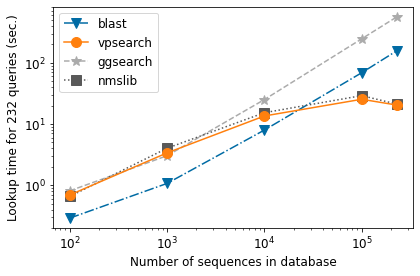

In [10]:
# log-log plot
markers = "vo*s"
for i, method in enumerate(METHODS):
    zorder = 10 if method == "vpsearch" else 1  # ensure that vpsearch curve is on top
    plt.loglog(means_xs[method],
               means_ys[method],
               label=method,
               marker=markers[i],
               linestyle=line_styles[method],
               zorder=zorder)

plt.legend()
plt.xlabel("Number of sequences in database")
plt.ylabel("Lookup time for 232 queries (sec.)")
plt.tight_layout()

plt.savefig("../manuscript/execution-time-nmslib.pdf")

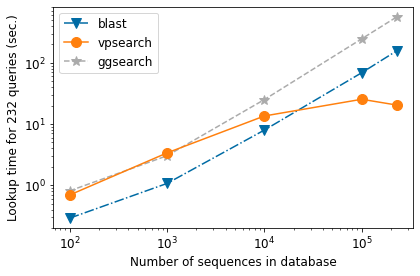

In [11]:
# log-log plot
markers = "vo*s"
for i, method in enumerate(METHODS[:-1]):
    zorder = 10 if method == "vpsearch" else 1  # ensure that vpsearch curve is on top
    plt.loglog(means_xs[method],
               means_ys[method],
               label=method,
               marker=markers[i],
               linestyle=line_styles[method],
               zorder=zorder)

plt.legend()
plt.xlabel("Number of sequences in database")
plt.ylabel("Lookup time for 232 queries (sec.)")
plt.tight_layout()

plt.savefig("../manuscript/execution-time.pdf")

In [12]:
means_xs

defaultdict(list,
            {'blast': [100, 1000, 10000, 100000, 230013],
             'vpsearch': [100, 1000, 10000, 100000, 230013],
             'ggsearch': [100, 1000, 10000, 100000, 230013],
             'nmslib': [100, 1000, 10000, 100000, 230013]})

In [13]:
# Comparison vpsearch / nmslib (factor)

vp = np.asarray(means_ys["vpsearch"])
nms = np.asarray(means_ys["nmslib"])

vp/nms

array([1.0573841 , 0.83938894, 0.88435063, 0.87182521, 0.96459287])